 #### Box and Muller


In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
def g(x, c):
    return 0.5 * c * np.exp(-np.abs(x))

For all $x \in \mathbb{R}$, i.e.

$$
\frac{1}{2} c e^{-|x|} \ge \frac{1}{\sqrt{2\pi}} e^{-x^2/2}.
$$

In [22]:
def c_min():
    return 2 * np.exp(0.5) / np.sqrt(2*np.pi)

c = c_min()
print("c* =", c)

c* = 1.315489246958914


In [38]:
def acc_rej_lap(N):
    Z = []
    for i in range(N):
        v = random.uniform(0, 1)
        u = random.uniform(0, 1)

        if v < 0.5:
            x =  np.log(2 * v)
        else:
            x = -np.log(2 * (1 - v))

        ucg = u * g(x, c)
        f = norm.pdf(x)

        if ucg <= f:
            Z.append(x)
    return Z

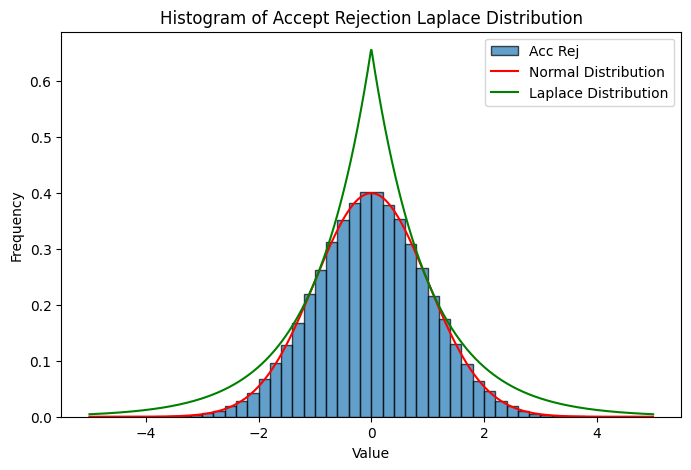

In [40]:
a = 5
plt.figure(figsize=(8, 5))
plt.hist(acc_rej_lap(200000), bins=50, range = (-a, a), edgecolor='black', alpha=0.7, density=True, label='Acc Rej')
x = np.linspace(-a, a, 1000)
plt.plot(x, norm.pdf(x), 'r-', label='Normal Distribution')
plt.plot(x, g(x, c), 'g-', label='Laplace Distribution')
plt.title(f'Histogram of Accept Rejection Laplace Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(False)
plt.show()